# Week4 授業前課題2 住宅価格を回帰分析しよう

## 【課題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
# モジュールをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

# train.csvの読み込み
df_train = pd.read_csv("train.csv")

#GrLivAreaとYearBuiltを抜き出す
df_extract = df_train.loc[:, ['GrLivArea', 'YearBuilt']]

#GrLivAreaとYearBuiltと目的変数SalePriceを抜き出す
df_extract_P = df_train.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]

df_extract_P.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


## 【課題2】回帰問題のパイプライン
データを簡単に分析、前処理し、 **線形回帰** による学習、推定、評価、可視化までの一連の流れ（パイプライン）を作成・実行してください。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

評価のための指標値は分類問題と異なり、平均二乗誤差（Mean Squared Error, MSE）を使うことが一般的です。

[sklearn.metrics.mean_squared_error — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

### データ分析

In [2]:
#特徴量の情報取得
df_extract_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [3]:
# 特徴量の要約統計量（平均、標準偏差など）を取得
df_extract_P.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


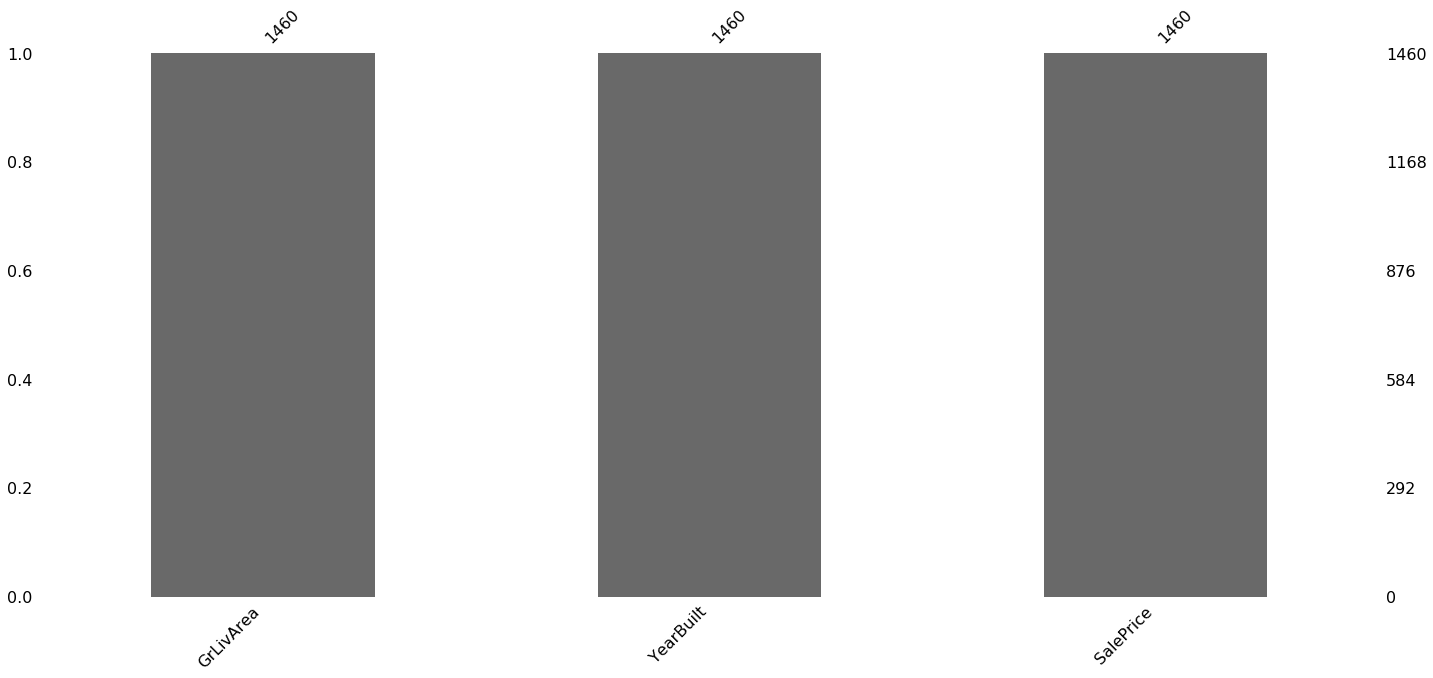

In [4]:
#missingnoモジュールのインポート
import missingno as msno

#欠損値の有無をバーとして表示
msno.bar(df_extract_P)
#欠損値がないことを確認

In [5]:
# 相関係数行列の確認
df_extract_P.corr(method='pearson')

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


### データ前処理

In [6]:
#ndarrayへ変換を行う(標準化のためにfloat型にする)
X = np.array(df_extract, dtype=float)
y = np.array(df_extract_P.loc[:,['SalePrice']], dtype=float)

#学習データ、検証データ分割ライブラリのインポート
from sklearn.model_selection import train_test_split

#学習用データ75%、検証データに25%分割する
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.25, random_state=30)

X_train[:10]

array([[2576., 2006.],
       [1224., 1962.],
       [1204., 1998.],
       [1466., 2007.],
       [1548., 1925.],
       [1708., 2004.],
       [1556., 1980.],
       [1052., 1968.],
       [1796., 1998.],
       [1178., 1900.]])

In [7]:
#説明変数に対して標準化を行う
#StandardScalerをインポート
from sklearn.preprocessing import StandardScaler

#インスタンス生成
scaler = StandardScaler()

#学習用データに対してfit
#渡されたデータの最大値、最小値、平均、標準偏差、傾き...などの統計を取得して、内部メモリに保存する。
scaler.fit(X_train)

#学習用・検証用データにに対してtransform
#fit()で取得した統計情報を使って、渡されたデータを実際に書き換える。
X_train_transform = scaler.transform(X_train)
X_validation_transform = scaler.transform(X_validation)

X_train_transform[:10]

array([[ 2.02735825,  1.15752058],
       [-0.53572191, -0.28731845],
       [-0.5736373 ,  0.89482258],
       [-0.07694573,  1.19035783],
       [ 0.07850736, -1.50229672],
       [ 0.38183045,  1.09184608],
       [ 0.09367351,  0.30375207],
       [-0.86179424, -0.09029494],
       [ 0.54865816,  0.89482258],
       [-0.6229273 , -2.32322799]])

### 学習・推定

In [8]:
# 線形回帰モジュールのインポート
from sklearn.linear_model import LinearRegression

#インスタンス生成、学習用データを線形回帰モデルを作成(デフォルトで実行)
reg = LinearRegression()


'''
・参考
reg = LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)

<memo>
・fit_intercept : 切片項をモデル式に入れるかどうか。デフォルト値はTrue。
・normalize : 説明変数を正規化するかどうか。デフォルト値はFalse。
・copy_X : メモリ内でデータを複製してから実行するかどうか。 デフォルト値はTrue。
・n_jobs : 計算に使うジョブ数。デフォルト値は1で-1にするとすべてのCPUを使って計算。
'''

reg.fit(X_train_transform, y_train)

# 線形回帰モデルを利用して予測する
y_train_pred = reg.predict(X_train_transform)
y_validation_pred = reg.predict(X_validation_transform)

print('予測値：\n{}'.format(y_train_pred[:10]))

print('検証値：\n{}'.format(y_train[:10]))

予測値：
[[311287.18237291]
 [144178.96798744]
 [180520.7921165 ]
 [213405.49755958]
 [133875.40161134]
 [231799.30787742]
 [192834.31188156]
 [135201.70621385]
 [233289.16534199]
 [ 74419.79373379]]
検証値：
[[361919.]
 [101800.]
 [162000.]
 [201000.]
 [205000.]
 [130000.]
 [151000.]
 [138500.]
 [211000.]
 [102776.]]


### 評価

In [9]:
#平均二乗誤差モジュールをインポート
from sklearn.metrics import mean_squared_error

# 学習用、検証用データに関して平均二乗誤差を出力
print('[MSE] 学習用データ : %.3f, 検証用データ : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_validation, y_validation_pred)))
# 学習用、検証用データに関してR^2を出力
print('[R^2] 学習用データ : %.3f, 検証用データ : %.3f' % (reg.score(X_train_transform, y_train), reg.score(X_validation_transform, y_validation)))



[MSE] 学習用データ : 2148457396.776, 検証用データ : 2325844746.508
[R^2] 学習用データ : 0.640, 検証用データ : 0.681


### 可視化

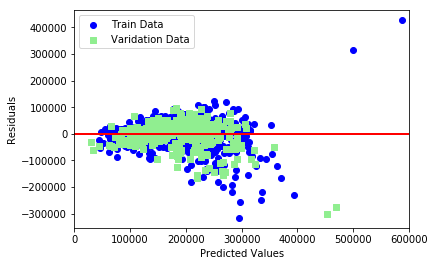

In [10]:
'''
残差プロットを表示する
'''

# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_validation_pred, y_validation_pred - y_validation, c = 'lightgreen', marker = 's', label = 'Varidation Data')

#x,yラベルを設定
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# 凡例を左上に表示
plt.legend(loc = 'upper left')

# y = 0に直線を引く
plt.hlines(y = 0, xmin = 0, xmax = 600000, lw = 2, color = 'red')
plt.xlim([0, 600000])

plt.show()

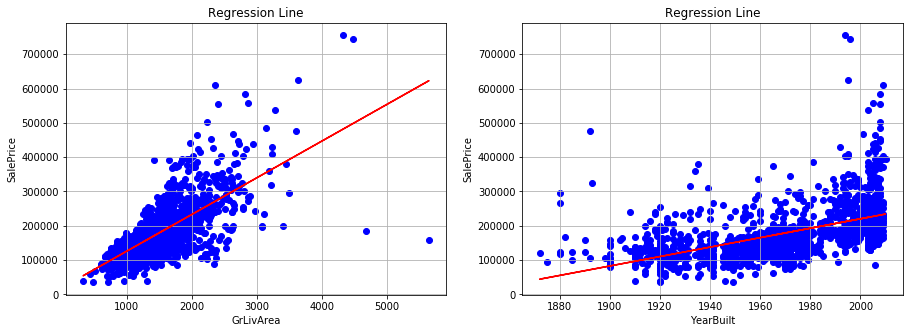

In [11]:
'''
回帰直線を求める
'''
# 変数の設定（numpyの配列）
X_GrLivArea = df_extract_P.loc[:,["GrLivArea"]].values
X_YearBuilt = df_extract_P.loc[:,["YearBuilt"]].values
Y_SalePrice = df_extract_P.loc[:,["SalePrice"]].values

#表示範囲を設定する
fig = plt.figure(figsize=(15,5))

#GrLivAreaとSalePriceの回帰直線を求める
reg1 = LinearRegression()
reg1.fit(X_GrLivArea, Y_SalePrice)          

ax1 = fig.add_subplot(1, 2, 1)

# 説明変数と目的変数のデータ点の散布図をプロット
ax1.scatter(X_GrLivArea, Y_SalePrice, color = 'blue') 

# 回帰直線をプロット
ax1.plot(X_GrLivArea, reg1.predict(X_GrLivArea), color = 'red') 

ax1.set_title('Regression Line')     # 図のタイトル
ax1.set_xlabel('GrLivArea')            #x軸のラベル
ax1.set_ylabel('SalePrice')             # y軸のラベル
ax1.grid()                                          # グリッド線を表示


#YearBuiltとSalePriceの回帰直線を求める
reg2 = LinearRegression()
reg2.fit(X_YearBuilt, Y_SalePrice)          

ax2 = fig.add_subplot(1, 2, 2)

# 説明変数と目的変数のデータ点の散布図をプロット
ax2.scatter(X_YearBuilt, Y_SalePrice, color = 'blue') 

# 回帰直線をプロット
ax2.plot(X_YearBuilt, reg2.predict(X_YearBuilt), color = 'red')

ax2.set_title('Regression Line')             # 図のタイトル
ax2.set_xlabel('YearBuilt')                     # x軸のラベル
ax2.set_ylabel('SalePrice')                     # y軸のラベル
ax2.grid()                                                  # グリッド線を表示


#図の表示
plt.show() 

【課題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はそれぞれパラメータをチューニングするべきですが、まずはデフォルトで実行しましょう。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)   
[sklearn.svm.SVR — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)  
[sklearn.tree.DecisionTreeRegressor — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)  
[sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

### SVM

In [12]:
#SVRのライブラリインポート
from sklearn.svm import SVR

# インスタンス生成(パラメータはデフォルト)
svr = SVR()

'''
参考：
svr = SVR(kernel='linear', C=1e3, epsilon=2.0)
'''

#予測モデルの作成
svr.fit(X_train_transform, y_train.reshape(-1)) 

# 線形回帰モデルを利用して予測する
y_train_pred = svr.predict(X_train_transform)
y_validation_pred = svr.predict(X_validation_transform)

print('予測値：\n{}'.format(y_train_pred[:10]))

print('検証値：\n{}'.format(y_train.reshape(-1)[:10]))


予測値：
[160251.89105475 159948.14139444 160187.52693772 160312.47455853
 159974.41578049 160363.60506991 160206.53400869 159938.63594677
 160363.5958556  160004.96064375]
検証値：
[361919. 101800. 162000. 201000. 205000. 130000. 151000. 138500. 211000.
 102776.]


In [13]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('[MSE] 学習用データ : %.3f, 検証用データ : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_validation, y_validation_pred)))

# 学習用、検証用データに関してR^2を出力
print('[R^2] 学習用データ : %.3f, 検証用データ : %.3f' % (svr.score(X_train_transform, y_train), svr.score(X_validation_transform, y_validation)))



[MSE] 学習用データ : 6286237743.819, 検証用データ : 8028269101.958
[R^2] 学習用データ : -0.055, 検証用データ : -0.103


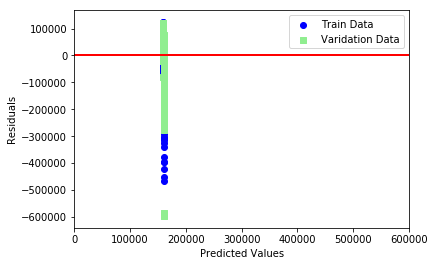

In [14]:
'''
残差プロットを表示する
'''

# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train.reshape(-1), c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_validation_pred, y_validation_pred - y_validation.reshape(-1), c = 'lightgreen', marker = 's', label = 'Varidation Data')

#x,yラベルを設定
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# 凡例を左上に表示
plt.legend(loc = 'best')

# y = 0に直線を引く
plt.hlines(y = 0, xmin = 0, xmax = 600000, lw = 2, color = 'red')
plt.xlim([0, 600000])

plt.show()

/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


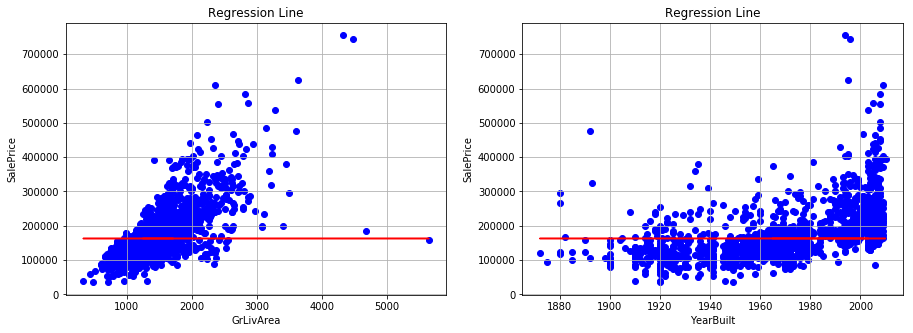

In [15]:
'''
回帰直線を求める
'''
# 変数の設定（numpyの配列）
X_GrLivArea = df_extract_P.loc[:,["GrLivArea"]].values
X_YearBuilt = df_extract_P.loc[:,["YearBuilt"]].values
Y_SalePrice = df_extract_P.loc[:,["SalePrice"]].values.reshape(-1)

#表示範囲を設定する
fig = plt.figure(figsize=(15,5))

#GrLivAreaとSalePriceの回帰直線を求める
reg1 = SVR()
reg1.fit(X_GrLivArea, Y_SalePrice)          

ax1 = fig.add_subplot(1, 2, 1)

# 説明変数と目的変数のデータ点の散布図をプロット
ax1.scatter(X_GrLivArea, Y_SalePrice, color = 'blue') 

# 回帰直線をプロット
ax1.plot(X_GrLivArea, reg1.predict(X_GrLivArea), color = 'red') 

ax1.set_title('Regression Line')     # 図のタイトル
ax1.set_xlabel('GrLivArea')            # x軸のラベル
ax1.set_ylabel('SalePrice')             # y軸のラベル
ax1.grid()                                          # グリッド線を表示


#YearBuiltとSalePriceの回帰直線を求める
reg2 = SVR()
reg2.fit(X_YearBuilt, Y_SalePrice)          

ax2 = fig.add_subplot(1, 2, 2)

# 説明変数と目的変数のデータ点の散布図をプロット
ax2.scatter(X_YearBuilt, Y_SalePrice, color = 'blue') 

# 回帰直線をプロット
ax2.plot(X_YearBuilt, reg2.predict(X_YearBuilt), color = 'red')

ax2.set_title('Regression Line')             # 図のタイトル
ax2.set_xlabel('YearBuilt')                     # x軸のラベル
ax2.set_ylabel('SalePrice')                     # y軸のラベル
ax2.grid()                                                  # グリッド線を表示


#図の表示
plt.show() 

### 決定木

In [16]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

#予測モデルの作成
DTR.fit(X_train_transform, y_train) 

# 線形回帰モデルを利用して予測する
y_train_pred = DTR.predict(X_train_transform)
y_validation_pred = DTR.predict(X_validation_transform)

print('予測値：\n{}'.format(y_train_pred[:10]))

print('検証値：\n{}'.format(y_train.reshape(-1)[:10]))

予測値：
[361919. 101800. 162000. 201000. 205000. 130000. 151000. 138500. 211000.
 102776.]
検証値：
[361919. 101800. 162000. 201000. 205000. 130000. 151000. 138500. 211000.
 102776.]


In [17]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('[MSE] 学習用データ : %.3f, 検証用データ : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_validation, y_validation_pred)))

# 学習用、検証用データに関してR^2を出力
print('[R^2] 学習用データ : %.3f, 検証用データ : %.3f' % (DTR.score(X_train_transform, y_train), DTR.score(X_validation_transform, y_validation)))



[MSE] 学習用データ : 5189162.955, 検証用データ : 4602124640.621
[R^2] 学習用データ : 0.999, 検証用データ : 0.368


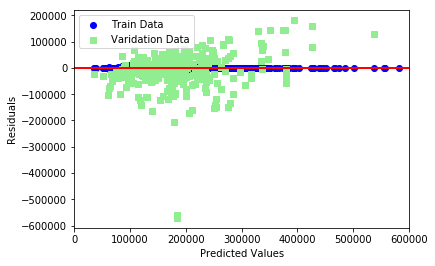

In [18]:
'''
残差プロットを表示する
'''

# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train.reshape(-1), c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_validation_pred, y_validation_pred - y_validation.reshape(-1), c = 'lightgreen', marker = 's', label = 'Varidation Data')

#x,yラベルを設定
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# 凡例を左上に表示
plt.legend(loc = 'best')

# y = 0に直線を引く
plt.hlines(y = 0, xmin = 0, xmax = 600000, lw = 2, color = 'red')
plt.xlim([0, 600000])

plt.show()

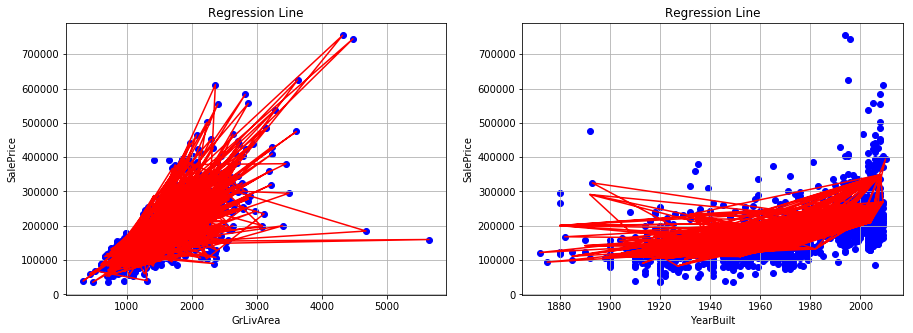

In [19]:
'''
回帰直線を求める
'''
# 変数の設定（numpyの配列）
X_GrLivArea = df_extract_P.loc[:,["GrLivArea"]].values
X_YearBuilt = df_extract_P.loc[:,["YearBuilt"]].values
Y_SalePrice = df_extract_P.loc[:,["SalePrice"]].values.reshape(-1)

#表示範囲を設定する
fig = plt.figure(figsize=(15,5))

#GrLivAreaとSalePriceの回帰直線を求める
reg1 = DecisionTreeRegressor()
reg1.fit(X_GrLivArea, Y_SalePrice)          

ax1 = fig.add_subplot(1, 2, 1)

# 説明変数と目的変数のデータ点の散布図をプロット
ax1.scatter(X_GrLivArea, Y_SalePrice, color = 'blue') 

# 回帰直線をプロット
ax1.plot(X_GrLivArea, reg1.predict(X_GrLivArea), color = 'red') 

ax1.set_title('Regression Line')     # 図のタイトル
ax1.set_xlabel('GrLivArea')            # x軸のラベル
ax1.set_ylabel('SalePrice')             # y軸のラベル
ax1.grid()                                          # グリッド線を表示


#YearBuiltとSalePriceの回帰直線を求める
reg2 = DecisionTreeRegressor()
reg2.fit(X_YearBuilt, Y_SalePrice)          

ax2 = fig.add_subplot(1, 2, 2)

# 説明変数と目的変数のデータ点の散布図をプロット
ax2.scatter(X_YearBuilt, Y_SalePrice, color = 'blue') 

# 回帰直線をプロット
ax2.plot(X_YearBuilt, reg2.predict(X_YearBuilt), color = 'red')

ax2.set_title('Regression Line')             # 図のタイトル
ax2.set_xlabel('YearBuilt')                     # x軸のラベル
ax2.set_ylabel('SalePrice')                     # y軸のラベル
ax2.grid()                                                  # グリッド線を表示


#図の表示
plt.show() 

### ランダムフォレスト

In [20]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

#予測モデルの作成
RFR.fit(X_train_transform, y_train) 

# 線形回帰モデルを利用して予測する
y_train_pred = RFR.predict(X_train_transform)
y_validation_pred = RFR.predict(X_validation_transform)

print('予測値：\n{}'.format(y_train_pred[:10]))

print('検証値：\n{}'.format(y_train.reshape(-1)[:10]))


予測値：
[339115.7 105760.  167440.  193851.5 185000.  130187.5 157840.  141650.
 208600.  111965.6]
検証値：
[361919. 101800. 162000. 201000. 205000. 130000. 151000. 138500. 211000.
 102776.]


/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [21]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('[MSE] 学習用データ : %.3f, 検証用データ : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_validation, y_validation_pred)))

# 学習用、検証用データに関してR^2を出力
print('[R^2] 学習用データ : %.3f, 検証用データ : %.3f' % (RFR.score(X_train_transform, y_train), RFR.score(X_validation_transform, y_validation)))



[MSE] 学習用データ : 286683507.057, 検証用データ : 2198688626.456
[R^2] 学習用データ : 0.952, 検証用データ : 0.698


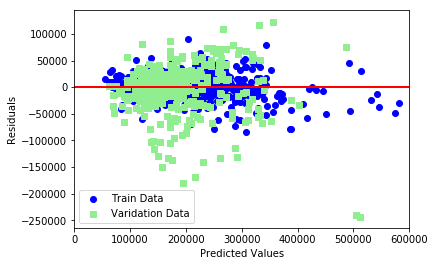

In [22]:
'''
残差プロットを表示する
'''

# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train.reshape(-1), c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_validation_pred, y_validation_pred - y_validation.reshape(-1), c = 'lightgreen', marker = 's', label = 'Varidation Data')

#x,yラベルを設定
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# 凡例を左上に表示
plt.legend(loc = 'best')

# y = 0に直線を引く
plt.hlines(y = 0, xmin = 0, xmax = 600000, lw = 2, color = 'red')
plt.xlim([0, 600000])

plt.show()

/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


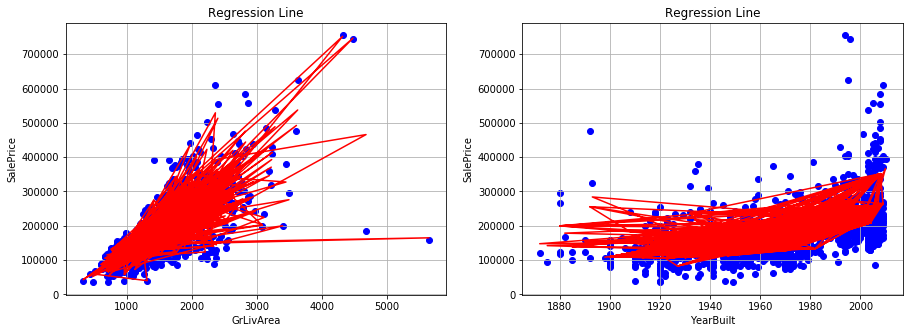

In [23]:
'''
回帰直線を求める

'''
# 変数の設定（numpyの配列）
X_GrLivArea = df_extract_P.loc[:,["GrLivArea"]].values
X_YearBuilt = df_extract_P.loc[:,["YearBuilt"]].values
Y_SalePrice = df_extract_P.loc[:,["SalePrice"]].values.reshape(-1)

#表示範囲を設定する
fig = plt.figure(figsize=(15,5))

#GrLivAreaとSalePriceの回帰直線を求める
reg1 = RandomForestRegressor()
reg1.fit(X_GrLivArea, Y_SalePrice)          

ax1 = fig.add_subplot(1, 2, 1)

# 説明変数と目的変数のデータ点の散布図をプロット
ax1.scatter(X_GrLivArea, Y_SalePrice, color = 'blue') 

# 回帰直線をプロット
ax1.plot(X_GrLivArea, reg1.predict(X_GrLivArea), color = 'red') 

ax1.set_title('Regression Line')     # 図のタイトル
ax1.set_xlabel('GrLivArea')            # x軸のラベル
ax1.set_ylabel('SalePrice')             # y軸のラベル
ax1.grid()                                          # グリッド線を表示


#YearBuiltとSalePriceの回帰直線を求める
reg2 = RandomForestRegressor()
reg2.fit(X_YearBuilt, Y_SalePrice)          

ax2 = fig.add_subplot(1, 2, 2)

# 説明変数と目的変数のデータ点の散布図をプロット
ax2.scatter(X_YearBuilt, Y_SalePrice, color = 'blue') 

# 回帰直線をプロット
ax2.plot(X_YearBuilt, reg2.predict(X_YearBuilt), color = 'red')

ax2.set_title('Regression Line')             # 図のタイトル
ax2.set_xlabel('YearBuilt')                     # x軸のラベル
ax2.set_ylabel('SalePrice')                     # y軸のラベル
ax2.grid()                                                  # グリッド線を表示


#図の表示
plt.show() 

### 課題3のまとめ・考察

- 平均二乗誤差（MSE）

| <index> |学習用データ |検証用データ |
|---|---|---|
|線形回帰|2,148,457,396.776|2,325,844,746.508|
|SVM|6,286,237,743.819|8,028,269,101.958|
|決定木|5,189,162.955|4,531,388,742.476|
|ランダムフォレスト|283,834,205.237|2,640,426,812.063|

- 決定係数（$R^2$）

| <index> |学習用データ |検証用データ |
|---|---|---|
|線形回帰|0.640|0.681|
|SVM|-0.055|-0.103|
|決定木|0.999|0.378|
|ランダムフォレスト|0.952|0.637|


### 考察

上記表より、平均二乗誤差は０に近づくほど、モデルの性能が良いと判断できるため、学習用データでは決定木の手法が圧倒的に良い結果を示したが、検証用データでは線形回帰の手法が良い結果を示した。  
決定係数においても、1に近づくほどモデルの性能が良いと判断できるため、平均二乗誤差と同様、学習用データでは決定木が、検証用データでは線形回帰の手法が良い結果を示しているが確認できた。  
それぞれの手法に対しての考察は下記の通り。

- **線形回帰**  
パラメータがデフォルトの状態においても、一定のモデル性能の高さを示した。目的変数'SalePrice'とそれぞれの説明変数における回帰直線において、相関関係が見られる予測グラフが生成されている。
- **SVM**  
パラメータがデフォルトの状態ではモデル性能が非常に悪い結果となり、目的変数の平均値付近の予測しかできていなかった。パラメータの設定変更によりモデル性能を改善することができると考えられる。
- **決定木**  
学習用データに対する予測については良い結果を示したが、検証用データに対する予測については、性能が大きく落ちた。それぞれの学習用データのプロット一つ一つに対して予測モデルを作成しており、回帰直線とは異なったグラフが確認できる。  
- **ランダムフォレスト**  
手法の名称の通り、決定木に近い結果とグラフを示した。ただし検証用データの予測結果における性能については、決定木より良い結果を示していることが確認できる。

## 【問題4】（アドバンス課題）各パラメータの意味
手法のパラメータはデフォルトとしましたが、実際に利用する上ではデフォルトは必ずしも良い設定ではありません。それぞれの意味を調査した上で複数の設定を試し、その結果を報告してください。

In [24]:
'''
回帰分析の関数化
input:
    model(回帰分析用のインスタンスモデル)
    
output:
    平均二乗誤差、決定係数の算出
    残差プロットの出力
'''

def regression_anaylysis(model):
    model.fit(X_train_transform, y_train.reshape(-1))

    # 線形回帰モデルを利用して予測する
    y_train_pred = model.predict(X_train_transform)
    y_validation_pred = model.predict(X_validation_transform)

    # 学習用、検証用データに関して平均二乗誤差を出力
    print('[MSE] 学習用データ : %.3f, 検証用データ : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_validation, y_validation_pred)))
    # 学習用、検証用データに関してR^2を出力
    print('[R^2] 学習用データ : %.3f, 検証用データ : %.3f' % (model.score(X_train_transform, y_train), model.score(X_validation_transform, y_validation)))

    '''
    残差プロットを表示する
    '''

    # 学習用、検証用それぞれで残差をプロット
    plt.scatter(y_train_pred, y_train_pred - y_train.reshape(-1), c = 'blue', marker = 'o', label = 'Train Data')
    plt.scatter(y_validation_pred, y_validation_pred - y_validation.reshape(-1), c = 'lightgreen', marker = 's', label = 'Varidation Data')

    #x,yラベルを設定
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # 凡例を左上に表示
    plt.legend(loc = 'upper left')

    # y = 0に直線を引く
    plt.hlines(y = 0, xmin = 0, xmax = 600000, lw = 2, color = 'red')
    plt.xlim([0, 600000])

    plt.show()
    
    

In [25]:
'''
回帰直線出力のの関数化
input:
    model(回帰分析用のインスタンス生成モデル)
    
output:
    横軸にGrLivArea、YearBuilt、縦軸にそれぞれSalePriceとした
    散布図と回帰直線の図を出力
'''

def regression_line(model):
    # 変数の設定（numpyの配列）
    X_GrLivArea = df_extract_P.loc[:,["GrLivArea"]].values
    X_YearBuilt = df_extract_P.loc[:,["YearBuilt"]].values
    Y_SalePrice = df_extract_P.loc[:,["SalePrice"]].values.reshape(-1)

    #表示範囲を設定する
    fig = plt.figure(figsize=(15,5))

    #GrLivAreaとSalePriceの回帰直線を求める
    model.fit(X_GrLivArea, Y_SalePrice)          

    ax1 = fig.add_subplot(1, 2, 1)

    # 説明変数と目的変数のデータ点の散布図をプロット
    ax1.scatter(X_GrLivArea, Y_SalePrice, color = 'blue') 

    # 回帰直線をプロット
    ax1.plot(X_GrLivArea, model.predict(X_GrLivArea), color = 'red') 

    ax1.set_title('Regression Line')     # 図のタイトル
    ax1.set_xlabel('GrLivArea')            #x軸のラベル
    ax1.set_ylabel('SalePrice')             # y軸のラベル
    ax1.grid()                                          # グリッド線を表示


    #YearBuiltとSalePriceの回帰直線を求める
    model.fit(X_YearBuilt, Y_SalePrice)          

    ax2 = fig.add_subplot(1, 2, 2)

    # 説明変数と目的変数のデータ点の散布図をプロット
    ax2.scatter(X_YearBuilt, Y_SalePrice, color = 'blue') 

    # 回帰直線をプロット
    ax2.plot(X_YearBuilt, model.predict(X_YearBuilt), color = 'red')

    ax2.set_title('Regression Line')             # 図のタイトル
    ax2.set_xlabel('YearBuilt')                     # x軸のラベル
    ax2.set_ylabel('SalePrice')                     # y軸のラベル
    ax2.grid()                                                  # グリッド線を表示


    #図の表示
    plt.show() 

### 線形回帰

**LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)**

*使用したパラメータ（各種WEBサイト、書籍より重要度が高いと思われるパラメータを抜粋）*  
※パラメータの内容とその設定を利用した結果を記載

- **fit_intercept : boolean, optional, default True**  
切片項をモデル式に入れるかどうか。デフォルト値はTrue。  
*今回のデータでは、Falseに設定すると指標値が大きく悪化する*


- **normalize : boolean, optional, default False**  
説明変数を正規化するかどうか。デフォルト値はFalse。  
*今回のデータではパラメータによって指標値に影響はなし*


- **n_jobs : int or None, optional (default=None)**  
計算に使うジョブ数。デフォルト値は1で-1にするとすべてのCPUを使って計算。  
*今回のデータではパラメータによって指標値に影響はなし*


[MSE] 学習用データ : 2148457396.776, 検証用データ : 2325844746.508
[R^2] 学習用データ : 0.640, 検証用データ : 0.681


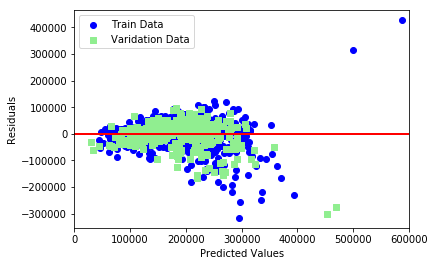

In [26]:
#インスタンス生成
reg = LinearRegression(fit_intercept = True, normalize = False, n_jobs = 1)

#回帰分析の実行
regression_anaylysis(reg)


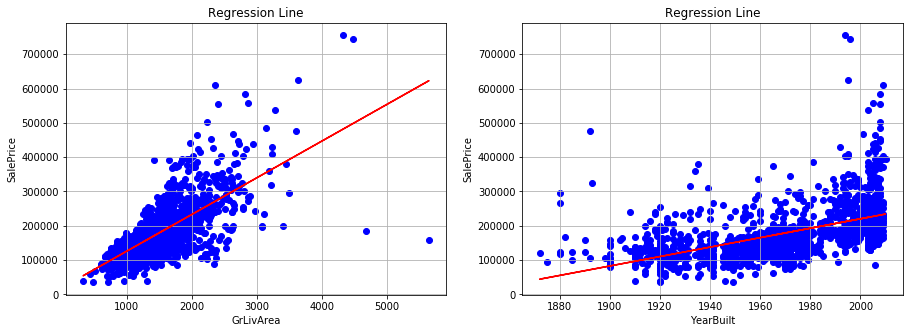

In [27]:
# 回帰直線を表示
regression_line(reg)

### SVM

**SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)**

*使用したパラメータ（各種WEBサイト、書籍より重要度が高いと思われるパラメータを抜粋）*  
※パラメータの内容とその設定を利用した結果を記載

- **kernel : string, optional (default=’rbf’)**  
カーネルタイプを選択する。 ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ より選択を行う。デフォルトはrbf。
*今回はlinearを選択*

- **gamma : float, optional (default=’auto’)**  
カーネルタイプが‘rbf’, ‘poly’ and ‘sigmoid’の時の係数を指定する。
*今回はカーネルをlinearとしているため、指定なし*

- **C : float, optional (default=1.0)**  
ペナルティパラメータ（罰則）Cの値を指定する。  
*今回はC=1e3とする。（値が増大すると処理時間が長くなる。）*


- **epsilon : float, optional (default=0.1)**  
回帰直線からどれだけ離れたらペナルティをかけるかを指定。  
*0.1〜100の間で検証用データが最も0に近づくepsilon=46を指定*

[MSE] 学習用データ : 2247880096.101, 検証用データ : 2620381904.088
[R^2] 学習用データ : 0.623, 検証用データ : 0.640


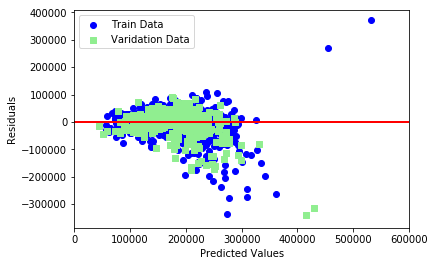

In [28]:
svr = SVR(kernel='linear', C=1e3, epsilon=46)

regression_anaylysis(svr)

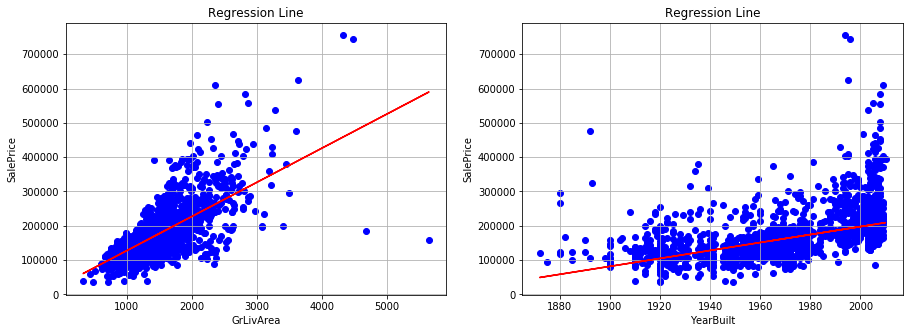

In [29]:
# 回帰直線を表示
regression_line(svr)

### 決定木

**DecisionTreeRegressor(criterion=’mse’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False**

*使用したパラメータ（各種WEBサイト、書籍より重要度が高いと思われるパラメータを抜粋）*  
※パラメータの内容とその設定を利用した結果を記載

- **criterion : string, optional (default=”mse”)**  
分割する際の基準を指定する。デフォルトはmseで平均二乗誤差となる。
*今回は、mae(平均絶対誤差)を指定し、検証用データの指標値がわずかながら改善*


- **max_depth : int or None, optional (default=None)**  
作成する決定木の深さの最大値。 (省略時は None)  
*今回は下記のmax_leaf_nodesによって指標値が改善されたため指定なし*


- **max_leaf_nodes : int or None, optional (default=None)**  
作成する葉の数の最大値。数値を指定した場合は、max_depth が無視される。 (省略時は None)。

- **random_state : int, RandomState instance or None, optional (default=None)**　　
乱数を制御するパラメータ
*今回は5を指定*

[MSE] 学習用データ : 1034177577.364, 検証用データ : 1875075214.584
[R^2] 学習用データ : 0.827, 検証用データ : 0.742


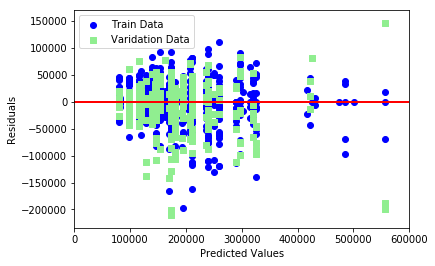

In [30]:
#インスタンス生成
DTR = DecisionTreeRegressor(criterion="mae", max_leaf_nodes=44, random_state=5)


#回帰分析を実行
regression_anaylysis(DTR)


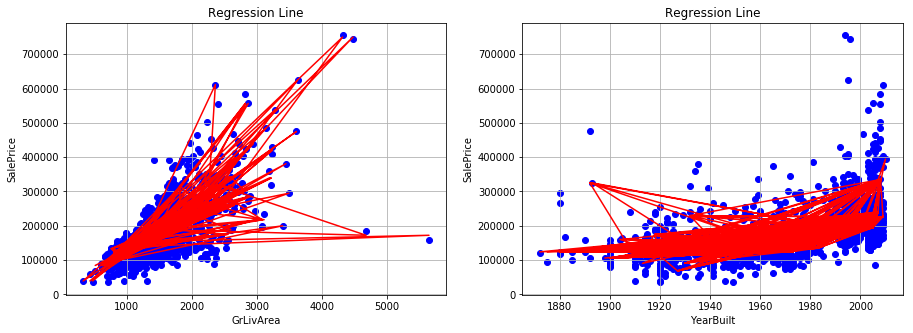

In [31]:
#回帰直線を表示
regression_line(DTR)

### ランダムフォレスト

**RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)**

*使用したパラメータ（各種WEBサイト、書籍より重要度が高いと思われるパラメータを抜粋）*  
※パラメータの内容とその設定を利用した結果を記載

- **n_estimators : integer, optional (default=10)**  
整数を指定．デフォルトの値は10。バギングに用いる決定木の個数を指定。  
今回は330を指定することにより検証用データの指標値が改善。


- **random_state : int, RandomState instance or None, optional (default=None)**  
乱数を制御するパラメータ。
指定しなければ、指標値が乱数に影響されるため、今回は1を設定。


- **max_depth : int or None, optional (default=None)**  
作成する決定木の深さの最大値。 (省略時は None)  
*今回は6を指定し、検証用データの指標値が改善*

[MSE] 学習用データ : 883022027.951, 検証用データ : 2113711261.802
[R^2] 学習用データ : 0.852, 検証用データ : 0.710


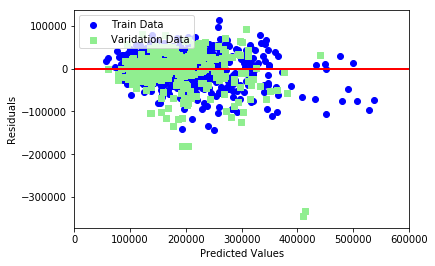

In [32]:
# インスタンス生成
RFR = RandomForestRegressor(n_estimators=330, max_depth=6, random_state=1)

#回帰分析を実行
regression_anaylysis(RFR)

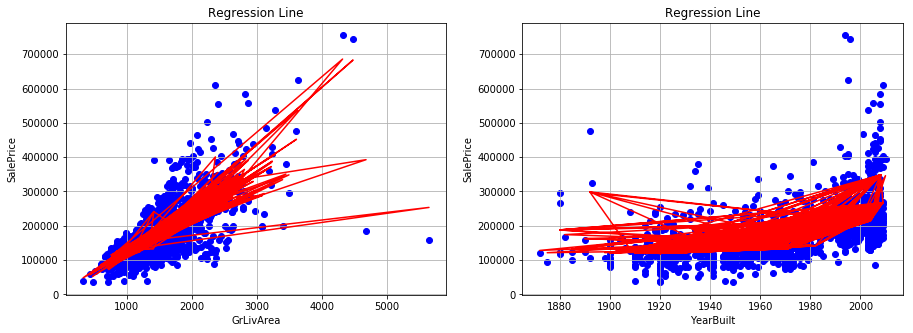

In [33]:
#回帰直線を表示
regression_line(RFR)

### 課題4のまとめ

- 平均二乗誤差（MSE）

| <index> |学習用データ |検証用データ |
|---|---|---|
|線形回帰|2,148,457,396.776|2,325,844,746.508|
|SVM|2,247,880,096.101|2,620,381,904.088|
|決定木|1,034,177,577.364|1,875,075,214.584|
|ランダムフォレスト|883,022,027.951|2,113,711,261.802|

- 決定係数（$R^2$）

| <index> |学習用データ |検証用データ |
|---|---|---|
|線形回帰|0.640|0.681|
|SVM|0.623|0.640|
|決定木|0.827|0.742|
|ランダムフォレスト|0.852|0.710|


### 考察
パラメータをデフォルトの状態から設定変更したことにより最も大きく指標値が改善したのはSVMとなった。決定木、ランダムフォレストは学習用データに対する指標値が下がったが、検証用データに対する予測指標値が改善した。
一方で線形回帰については、パラメータ変更による指標値の改善が確認できなかった。
そのほか、SVMにおけるパラメータ設定により、処理時間が大幅に伸びる場合もあり、指標値の改善と処理時間の兼ね合いの検証が必要。

## 【問題5】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

Kaggleのカーネルも参考にできます。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels)

In [34]:
'''
・目的変数　SalePriceと相関の高い上位10の特徴量を選択する
・特徴量の選択方法以外は、課題4と同じパラメータ等にて検証を行う
'''

#相関係数行列を作成
corr_df_train = df_train.corr(method="pearson")

#目的変数との相関の高い特徴量１０個をリストに格納
highcorr_SalePrice_feature10 = corr_df_train.sort_values('SalePrice', ascending=False)["SalePrice"].index.values[0:11]

# 上記で取得した特徴量のデータセットを作成
df_train_10 = df_train[highcorr_SalePrice_feature10[1:]]

df_train_10.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000


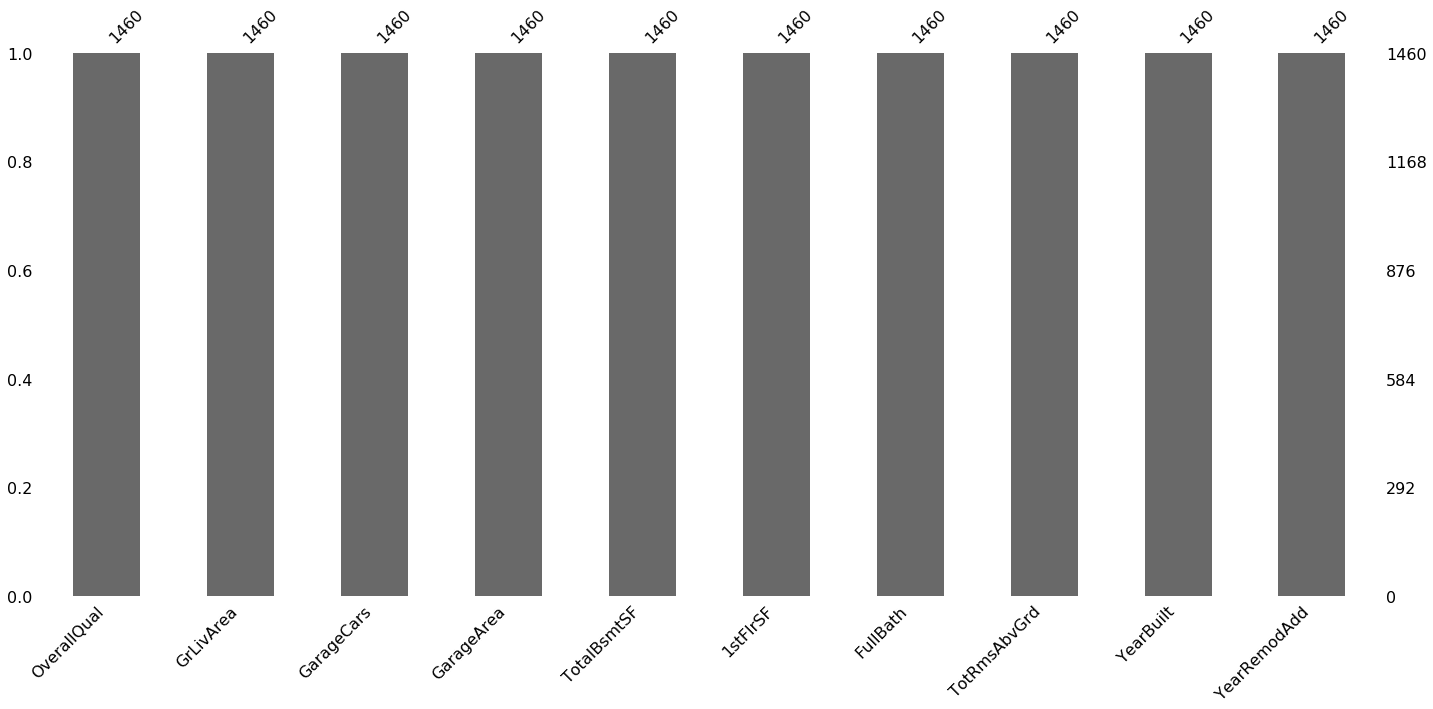

In [35]:
#欠損値の有無をバーとして表示
msno.bar(df_train_10)
#欠損値がないことを確認

In [36]:
#ndarrayへ変換を行う(標準化のためにfloat型にする)
X = np.array(df_train_10, dtype=float)
y = np.array(df_train.loc[:,['SalePrice']], dtype=float)

#学習データ、検証データ分割ライブラリのインポート
from sklearn.model_selection import train_test_split

#学習用データ75%、検証データに25%分割する
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.25, random_state=30)


In [37]:
#説明変数に対して標準化を行う
#StandardScalerをインポート
from sklearn.preprocessing import StandardScaler

#インスタンス生成
scaler = StandardScaler()

#学習用データに対してfit
#渡されたデータの最大値、最小値、平均、標準偏差、傾き...などの統計を取得して、内部メモリに保存する。
scaler.fit(X_train)

#学習用・検証用データにに対してtransform
#fit()で取得した統計情報を使って、渡されたデータを実際に書き換える。
X_train_transform = scaler.transform(X_train)
X_validation_transform = scaler.transform(X_validation)

[MSE] 学習用データ : 1406183719.468, 検証用データ : 1614671135.641
[R^2] 学習用データ : 0.764, 検証用データ : 0.778


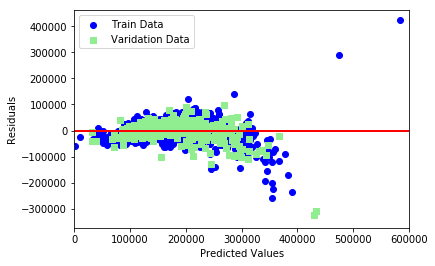

In [38]:
#線形回帰にてインスタンス生成
reg = LinearRegression(fit_intercept = True, normalize = False, n_jobs = 1)

#回帰分析の実行
regression_anaylysis(reg)

[MSE] 学習用データ : 1515629675.846, 検証用データ : 1733333729.343
[R^2] 学習用データ : 0.746, 検証用データ : 0.762


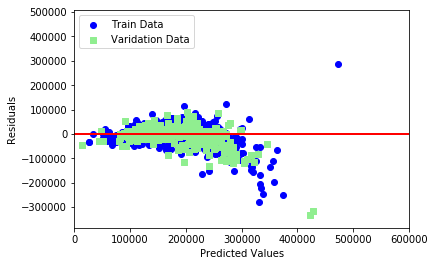

In [39]:
#SVM回帰のインスタンス生成
svr = SVR(kernel='linear', C=1e3, epsilon=46)

regression_anaylysis(svr)

[MSE] 学習用データ : 694736354.817, 検証用データ : 1322079007.551
[R^2] 学習用データ : 0.883, 検証用データ : 0.818


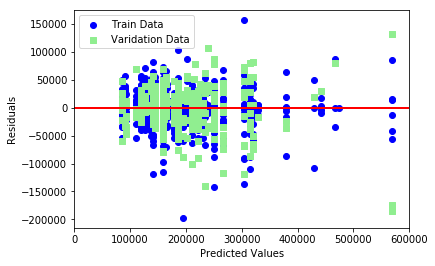

In [40]:
#決定木のインスタンス生成
DTR = DecisionTreeRegressor(criterion="mae", max_leaf_nodes=44, random_state=5)

#回帰分析を実行
regression_anaylysis(DTR)

[MSE] 学習用データ : 451777317.220, 検証用データ : 1434231739.000
[R^2] 学習用データ : 0.924, 検証用データ : 0.803


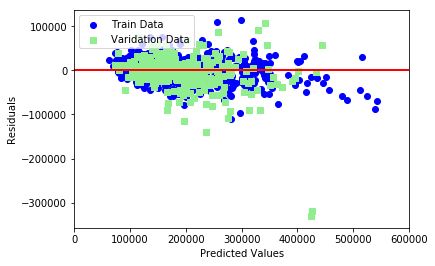

In [41]:
# ランダムフォレスターのインスタンス生成
RFR = RandomForestRegressor(n_estimators=330, max_depth=6, random_state=1)

#回帰分析を実行
regression_anaylysis(RFR)

### 課題5のまとめ

- 平均二乗誤差（MSE）

| <index> |学習用データ |検証用データ |
|---|---|---|
|線形回帰|1,406,183,719.468|1,614,671,135.641|
|SVM|1,515,629,675.846|1,733,333,729.343|
|決定木|694,736,354.817|1,322,079,007.551|
|ランダムフォレスト|451,777,317.220|1,434,231,739.000|

- 決定係数（$R^2$）

| <index> |学習用データ |検証用データ |
|---|---|---|
|線形回帰|0.764|0.778|
|SVM|0.746|0.762|
|決定木|0.883|0.818|
|ランダムフォレスト|0.924|0.803|

相関関係の高い特徴量を用いることにより指標値が全体として改善することができ、予測精度を高めることができた。